# Distribuições de Dados

Para aprofundarmos em Distribuições de Dados vamos primeiro revisar as medidas de dispersão.

## Medidas de Dispersão
 
As **medidas de dispersão** são ferramentas estatísticas que nos ajudam a entender a variabilidade ou a dispersão dos dados em torno de uma medida central, como a média ou a mediana. Enquanto as medidas de tendência central (média, mediana, moda) resumem os dados em um único valor, as medidas de dispersão nos mostram o quão espalhados ou concentrados estão os dados.

Neste tópico, exploraremos as principais medidas de dispersão, como **variância**, **desvio padrão**, **amplitude** e **intervalo interquartil (IQR)**, e discutiremos como elas são usadas na análise de dados.

---

As medidas de dispersão são essenciais para:

- Compreensão da variabilidade pois nos ajudam a entender o quão consistentes ou variáveis são os dados.

- Comparação entre conjuntos de dados uma vez que podemos comparar a dispersão de diferentes conjuntos de dados para identificar padrões ou anomalias.

- Fundamentos para técnicas estatísticas, pois veremos que além do Teorema do Limite Central, intervalos de confiança e testes de hipóteses, também dependem do entendimento da dispersão dos dados.

--- 

#### Amplitude
A **amplitude** é a diferença entre o maior e o menor valor de um conjunto de dados. É a medida de dispersão mais simples, mas também a mais sensível a valores extremos (outliers).

$$
\text{Amplitude} = \text{Valor Máximo} - \text{Valor Mínimo}
$$

**Exemplo**: Em um conjunto de dados $[3, 7, 8, 5, 12]$, a amplitude é $12 - 3 = 9$.

---

####  Variância
A **variância** mede o quão distantes os valores estão da média. É calculada como a média dos quadrados das diferenças entre cada valor e a média.

$$
\text{Variância} (\sigma^2) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Onde:
- $x_i$: Cada valor do conjunto de dados.
- $\bar{x}$: Média dos dados.
- $n$: Número de observações.

**Exemplo**: Para o conjunto de dados $[3, 7, 8, 5, 12]$, a variância é calculada a patir de $\bar{x} = 7$, como:

$$
\sigma^2 = \frac{(3-7)^2 + (7-7)^2 + (8-7)^2 + (5-7)^2 + (12-7)^2}{5} = 10.8
$$

---

#### Desvio Padrão
O **desvio padrão** é a raiz quadrada da variância. Ele expressa a dispersão dos dados na mesma unidade dos dados originais, o que facilita a interpretação.

$$
\text{Desvio Padrão} (\sigma) = \sqrt{\text{Variância}}
$$

**Exemplo**: No mesmo conjunto de dados, o desvio padrão é $\sqrt{10.8} \approx 3.29$.

---

#### Intervalo Interquartil (IQR)
O **intervalo interquartil (IQR)** é a diferença entre o terceiro quartil ($Q3$) e o primeiro quartil ($Q1$). Ele mede a dispersão dos 50% centrais dos dados, sendo menos sensível a valores extremos.

$$
\text{IQR} = Q3 - Q1
$$

**Exemplo**: Para o conjunto de dados $[3, 5, 7, 8, 12]$, os quartis são:
- $Q1 = 5$
- $Q3 = 8$
- $\text{IQR} = 8 - 5 = 3$

---

### Medida de Dispersão Adequada

- **Amplitude**: Útil para uma visão rápida da dispersão, mas sensível a outliers.
- **Variância e Desvio Padrão**: Ideais para dados simétricos e sem outliers.
- **IQR**: Melhor para dados assimétricos ou com outliers.

---

### Exemplo Prático: Análise de Dados de Rendimento Anual
Vamos usar os dados do capítulo 2 do livro {cite:p}`bruce2020practical` sobre rendimentos anuais de candidatos a empréstimos. 

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path 
from scipy import stats
from sklearn.utils import resample 

In [2]:
LOANS_INCOME_CSV = 'data/loans_income.csv' 

loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

# Calcular as medidas de dispersão
amplitude = loans_income.max() - loans_income.min()
variancia = loans_income.var()
desvio_padrao = loans_income.std()
iqr = loans_income.quantile(0.75) - loans_income.quantile(0.25)

# Exibir os resultados
print(f"Amplitude: {amplitude}")
print(f"Variância: {round(variancia)}")
print(f"Desvio Padrão: {round(desvio_padrao)}")
print(f"IQR: {round(iqr)}") 

Amplitude: 195000
Variância: 1080570709
Desvio Padrão: 32872
IQR: 40000


Podemos fazer uma representação gráfica de algumas dessas medidas de dispersão com uma distribuição seguida de um boxplot. 

/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


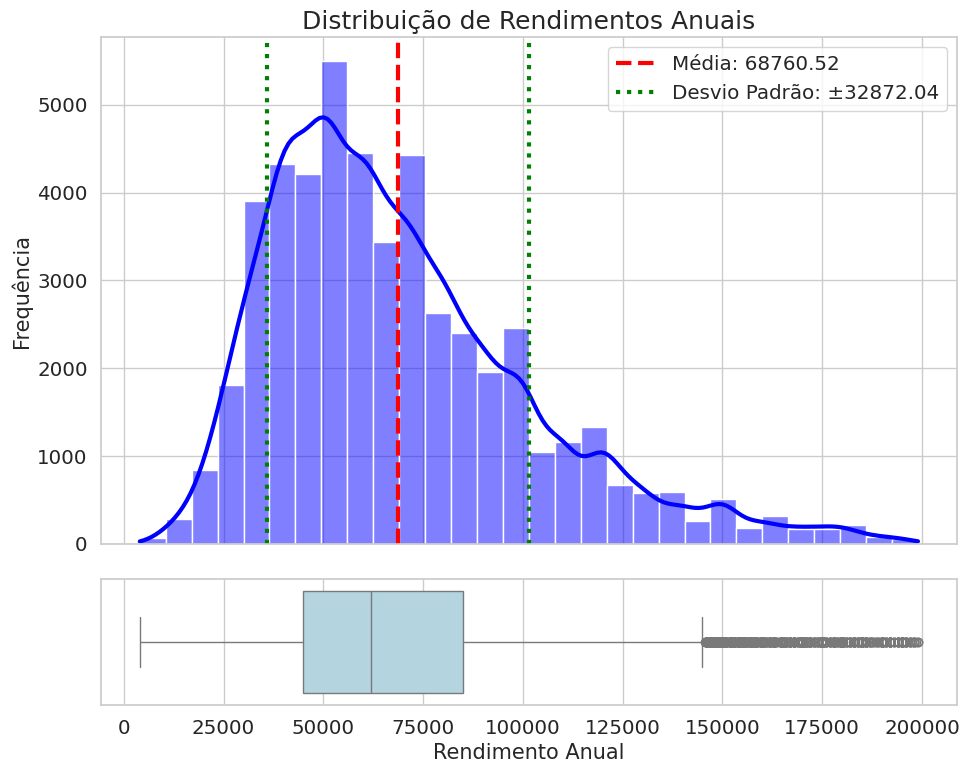

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de dados (substitua pelo seu DataFrame ou série)
np.random.seed(42) 

# Configuração do estilo do gráfico
sns.set(style="whitegrid")
# Configuração do estilo do gráfico
sns.set(style="whitegrid", font_scale=1.3)  # Reduz o tamanho da fonte global
plt.rcParams['lines.linewidth'] = 3  # Define a espessura das linhas como fina
# Criação da figura e dos eixos
fig, (ax1, ax2) = plt.subplots(
    nrows=2, 
    figsize=(10, 8), 
    gridspec_kw={'height_ratios': [4, 1]}, 
    sharex=True
)

# Gráfico de distribuição (histograma + curva de densidade)
sns.histplot(loans_income, kde=True, ax=ax1, color='blue', bins=30)
ax1.set_title('Distribuição de Rendimentos Anuais', fontsize=18)
ax1.set_ylabel('Frequência', fontsize=15)

# Boxplot horizontal
sns.boxplot(x=loans_income, ax=ax2, color='lightblue', orient='h')
ax2.set_xlabel('Rendimento Anual', fontsize=15)

# Adicionar média e desvio padrão ao gráfico de distribuição
media = loans_income.mean()
desvio_padrao = loans_income.std()
ax1.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
ax1.axvline(media - desvio_padrao, color='green', linestyle=':', label=f'Desvio Padrão: ±{desvio_padrao:.2f}')
ax1.axvline(media + desvio_padrao, color='green', linestyle=':')
ax1.legend(loc='upper right')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

A distância do desvio padrão dos dados é representada para a direita e para a esquerda pelas linhas verdes. A linha vermelha representa a média. 
No gráfico de baixo temos um boxplot que mostra a mediana e o tamanho da caixa é o IQR (Intervalo Interquartil).
O boxplot é uma forma simplicada de visualizar a distribuição dos dados.

## Distribuição de Amostragem 

O termo **distribuição de amostragem de uma estatística** do segundo capítulo de {cite:p}`bruce2020practical`, refere-se à distribuição de valores de uma estatística (como a média ou o desvio padrão) calculada a partir de várias amostras extraídas de uma mesma população. Na estatística clássica, um dos principais objetivos é fazer inferências sobre uma população com base em amostras relativamente pequenas. Devemos considerar os importantes tópicos:

- **Inferência Estatística**: Quando extraímos uma amostra de uma população, usamos estatísticas amostrais (como a média ou a variância) para estimar parâmetros populacionais. No entanto, como estamos trabalhando com uma amostra, há sempre um grau de incerteza associado a essas estimativas.
- **Variabilidade Amostral**: Diferentes amostras podem produzir estatísticas diferentes. A distribuição de amostragem nos ajuda a entender a variabilidade dessas estatísticas e a quantificar a incerteza associada às nossas estimativas.
- **Tamanho da Amostra**: Quanto maior o tamanho da amostra, mais precisa e estável será a estimativa da estatística. Isso ocorre porque a distribuição de amostragem tende a se tornar mais concentrada e simétrica à medida que o tamanho da amostra aumenta.

### Diferença Entre Distribuição dos Dados e Distribuição de Amostragem

- **Distribuição dos Dados**: Refere-se à distribuição dos valores individuais em um conjunto de dados. Por exemplo, a distribuição dos rendimentos anuais de candidatos a empréstimo.
- **Distribuição de Amostragem**: Refere-se à distribuição de uma estatística (como a média) calculada a partir de várias amostras. Essa distribuição tende a ser mais regular e próxima de uma distribuição normal (campanular) do que a distribuição dos dados originais.

 

 


 
### Exemplo Prático: Rendimentos Anuais de Candidatos a Empréstimo

Vamos ilustrar esses conceitos com um exemplo utilizando dados de rendimentos anuais de candidatos a empréstimo no Lending Club usado anteriormente. Considere três cenários:

1. **Amostra de 1.000 valores individuais**:
   - A distribuição dos dados é amplamente espalhada e assimétrica, com uma inclinação para valores mais altos.

2. **Amostra de 1.000 médias de 5 valores**:
   - A distribuição das médias é mais compacta e próxima de uma distribuição normal.

3. **Amostra de 1.000 médias de 20 valores**:
   - A distribuição das médias é ainda mais compacta e campanular, demonstrando o efeito do aumento do tamanho da amostra.

Vamo construir um código para gerar os histogramas.

In [4]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
33553   92000.0  Data
9427    50000.0  Data
199     40000.0  Data
12447   95000.0  Data
39489  135000.0  Data


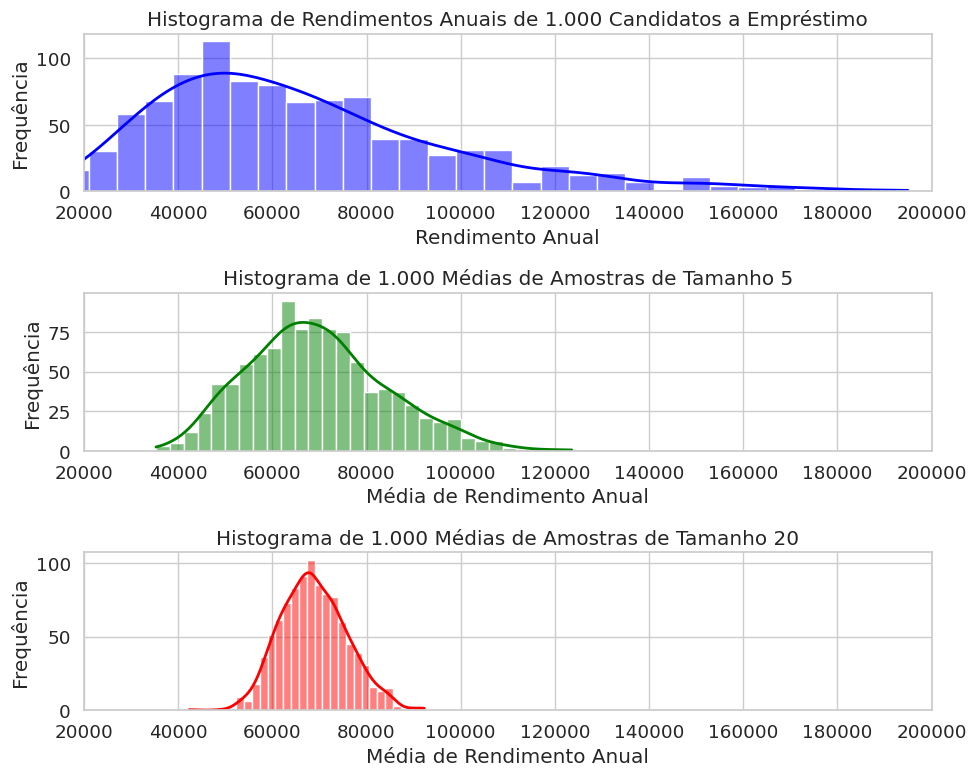

In [5]:
# Simulação dos dados de rendimento anual
np.random.seed(42)  # Para reproducibilidade
 
# Amostra de 1.000 valores individuais
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000, random_state=42),
    'type': 'Data',
})

# Amostra de 1.000 médias de 5 valores
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5, random_state=i).mean() for i in range(1000)],
    'type': 'Mean of 5',
})

# Amostra de 1.000 médias de 20 valores
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20, random_state=i).mean() for i in range(1000)],
    'type': 'Mean of 20',
})

# Combina os dados em um único DataFrame
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

# Configuração do estilo do gráfico
sns.set(style="whitegrid")

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['lines.linewidth'] = 2

# Criação dos histogramas
plt.figure(figsize=(10, 8))

# Histograma para os dados originais
plt.subplot(3, 1, 1)
sns.histplot(sample_data['income'], kde=True, color='blue', bins=30)
plt.xlim(20000, 200000)
plt.title('Histograma de Rendimentos Anuais de 1.000 Candidatos a Empréstimo')
plt.xlabel('Rendimento Anual')
plt.ylabel('Frequência')

# Histograma para as médias de 5 valores
plt.subplot(3, 1, 2)
sns.histplot(sample_mean_05['income'], kde=True, color='green', bins=30)
plt.xlim(20000, 200000)
plt.title('Histograma de 1.000 Médias de Amostras de Tamanho 5')
plt.xlabel('Média de Rendimento Anual')
plt.ylabel('Frequência')

# Histograma para as médias de 20 valores
plt.subplot(3, 1, 3)
sns.histplot(sample_mean_20['income'], kde=True, color='red', bins=30)
plt.xlim(20000, 200000)
plt.title('Histograma de 1.000 Médias de Amostras de Tamanho 20')
plt.xlabel('Média de Rendimento Anual')
plt.ylabel('Frequência')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

No gráfico foi usada a biblioteca seaborn. 

## Teorema do Limite Central

O **Teorema do Limite Central (TLC)** é um dos conceitos mais importantes da estatística e da ciência de dados. Ele fornece a base teórica para muitas técnicas de inferência estatística, como intervalos de confiança e testes de hipóteses. Neste tópico, exploraremos o que é o TLC, por que ele é importante e como aplicá-lo na prática.

---

### Conceito

O Teorema do Limite Central afirma que, **independentemente da distribuição da população**, a distribuição das médias amostrais se aproxima de uma distribuição normal à medida que o tamanho da amostra aumenta. Em outras palavras:

- Se você coletar várias amostras de uma população (com ou sem distribuição normal) e calcular a média de cada amostra, a distribuição dessas médias será aproximadamente normal.
- Quanto maior o tamanho da amostra, mais próxima a distribuição das médias estará de uma distribuição normal.

### Conceito formal

Dada uma população com média $\mu$ e desvio padrão $\sigma$, a distribuição das médias amostrais ($\bar{X}$) de tamanho $n$ terá:
- Média: $\mu$
- Desvio padrão: $\frac{\sigma}{\sqrt{n}}$ (também conhecido como **erro padrão da média**)

A distribuição das médias amostrais será aproximadamente normal para $n$ suficientemente grande (geralmente $n \geq 30$).

---

### Importância

O TLC é fundamental porque:
1. **Permite inferências sobre populações**: Mesmo que a distribuição da população seja desconhecida ou não normal, podemos usar a distribuição normal para fazer inferências sobre a média populacional.
2. **Justifica o uso da distribuição normal**: Muitas técnicas estatísticas, como testes de hipóteses e intervalos de confiança, assumem que a distribuição das médias amostrais é normal.
3. **Aplica-se a diversas situações**: O TLC é válido para quase qualquer tipo de distribuição populacional, desde que as amostras sejam suficientemente grandes.

---

### Condições para aplicação

Para que o TLC seja válido, algumas condições devem ser atendidas:
1. **Amostras independentes**: As observações na amostra devem ser independentes umas das outras.
2. **Tamanho da amostra**: O TLC funciona melhor com amostras grandes ($n \geq 30$). Para populações altamente assimétricas, amostras maiores podem ser necessárias.
3. **Variância finita**: A população deve ter uma variância finita ($\sigma^2 < \infty$).

---
 

### Exemplo gráfico para o teorema do limite central

Para ilustrar o TLC graficamente nós vamos fazer o equivalente ao que foi feito no exemplo de rendimentos anuais, que foi discutido anteriormente. Portanto iremos:
 
- Usar uma distribuição assimétrica (por exemplo, uma distribuição exponencial ou log-normal) para simular a população.

- Extrair várias amostras de tamanho pequeno, médio e grande da população.

- Calcule a média de cada amostra.

- Plotar as distribuições das médias amostrais a fim de comparar a distribuição das médias amostrais com a distribuição da população.

- Por fim mostrar como a distribuição das médias se torna mais normal à medida que o tamanho da amostra aumenta.

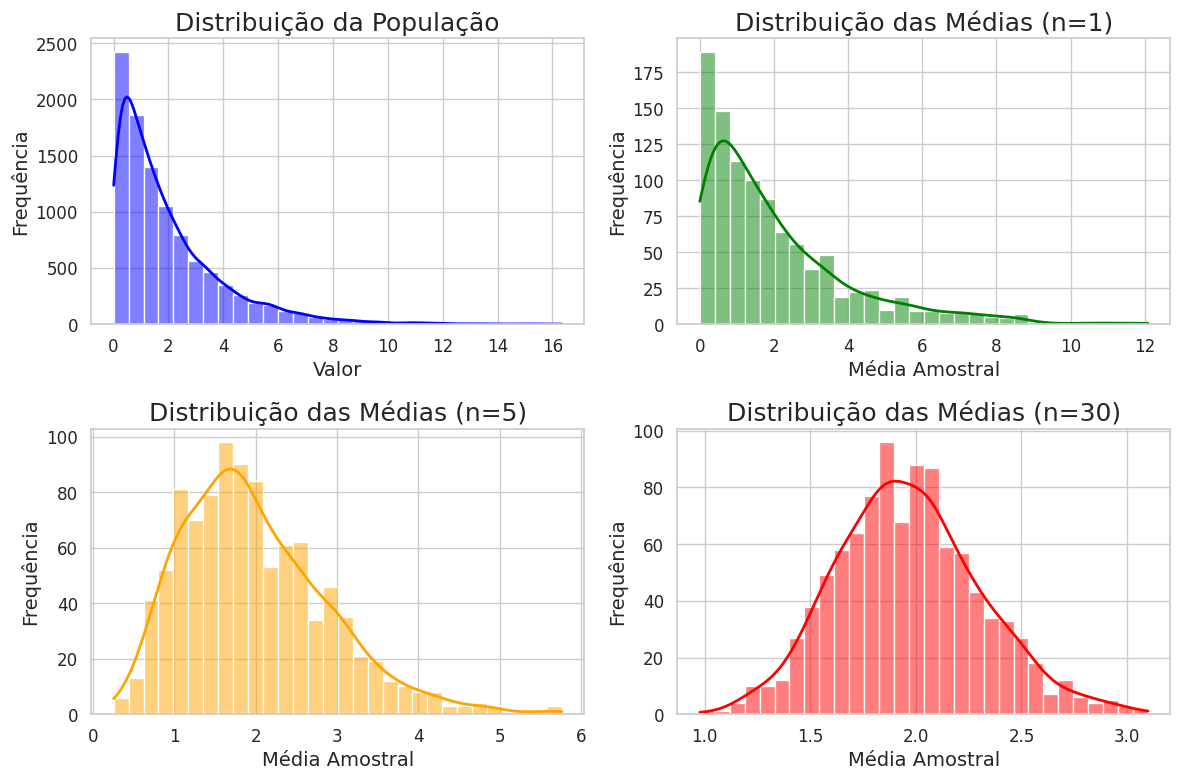

In [6]:
# Configuração do estilo do gráfico
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['lines.linewidth'] = 2

# Gerar dados de uma população não normal (distribuição exponencial)
np.random.seed(42)
populacao = np.random.exponential(scale=2.0, size=10000)

# Função para calcular médias amostrais
def calcular_medias_amostrais(populacao, tamanho_amostra, n_amostras):
    medias = [np.mean(np.random.choice(populacao, tamanho_amostra)) for _ in range(n_amostras)]
    return medias

# Tamanhos das amostras
tamanhos_amostra = [1, 5, 30, 100]
n_amostras = 1000

# Calcular médias para cada tamanho de amostra
medias_amostrais = {f'n={n}': calcular_medias_amostrais(populacao, n, n_amostras) for n in tamanhos_amostra}

# Criar DataFrame para facilitar a plotagem
df = pd.DataFrame(medias_amostrais)

# Plotar as distribuições
plt.figure(figsize=(12, 8))

# Distribuição da população
plt.subplot(2, 2, 1)
sns.histplot(populacao, kde=True, color='blue', bins=30)
plt.title('Distribuição da População', fontsize=18)
plt.xlabel('Valor', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Distribuição das médias amostrais para n=1
plt.subplot(2, 2, 2)
sns.histplot(df['n=1'], kde=True, color='green', bins=30)
plt.title('Distribuição das Médias (n=1)', fontsize=18)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Distribuição das médias amostrais para n=5
plt.subplot(2, 2, 3)
sns.histplot(df['n=5'], kde=True, color='orange', bins=30)
plt.title('Distribuição das Médias (n=5)', fontsize=18)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Distribuição das médias amostrais para n=30
plt.subplot(2, 2, 4)
sns.histplot(df['n=30'], kde=True, color='red', bins=30)
plt.title('Distribuição das Médias (n=30)', fontsize=18)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

## O Método Bootstrap

O **método Bootstrap** é uma técnica de reamostragem usada em estatística para estimar a distribuição de uma estatística (como a média, mediana ou desvio padrão) a partir de amostras aleatórias com reposição. Ele é especialmente útil quando a distribuição teórica da estatística é desconhecida ou difícil de derivar.

A ideia central do Bootstrap é gerar várias amostras (chamadas de amostras bootstrap) a partir dos dados originais, calcular a estatística de interesse para cada amostra e, em seguida, usar essas estatísticas para inferir propriedades da distribuição, como intervalos de confiança ou erro padrão.
   
   O Bootstrap é uma técnica não paramétrica, ou seja, não assume que os dados seguem uma distribuição específico. Pode ser aplicado a uma ampla variedade de estatísticas, desde médias até coeficientes de regressão.
Além disso é fácil de implementar e entender, especialmente com o uso de ferramentas computacionais, funcionando bem com pequenas amostras e dados complexos.
  
```{figure} /_static/bootstrap.png
:alt: Descrição da imagem
:width: 800px
:align: center

---


### Passos do Método Bootstrap

1. **Coletar uma amostra original**: Tenha um conjunto de dados de tamanho $n$.
2. **Gerar amostras bootstrap**:
   - Extraia amostras de tamanho $n$ **com reposição** a partir dos dados originais.
   - Repita esse processo $B$ vezes (geralmente $B = 1000$ ou mais).
3. **Calcular a estatística de interesse**:
   - Para cada amostra bootstrap, calcule a estatística desejada (por exemplo, a média).
4. **Analisar a distribuição das estatísticas**:
   - Use as estatísticas bootstrap para estimar intervalos de confiança, erro padrão ou outras propriedades.

---

### Aplicações do Bootstrap

1. **Estimação de intervalos de confiança**:
   - Calcule intervalos de confiança para estatísticas como a média ou a mediana.
2. **Estimação de erro padrão**:
   - Use o desvio padrão das estatísticas bootstrap para estimar o erro padrão.
3. **Testes de hipóteses**:
   - Compare estatísticas de diferentes grupos usando amostras bootstrap.
4. **Validação de modelos**:
   - Avalie a performance de modelos de machine learning usando técnicas como o Bootstrap Aggregating (Bagging).

---
 
Vamos ilustrar o método Bootstrap com um exemplo simples: estimar o intervalo de confiança para a média de um conjunto de dados. 

In [7]:
# Dados originais
dados = [30, 35, 40, 45, 50, 55, 60, 100]
n = len(dados)  # Tamanho da amostra original
B = 1000  # Número de amostras bootstrap

# Gerar amostras bootstrap e calcular a média de cada uma
medias_bootstrap = []
for _ in range(B):
    amostra = np.random.choice(dados, size=n, replace=True)  # Amostra com reposição
    media = np.mean(amostra)
    medias_bootstrap.append(media)

# Calcular estatísticas
media_original = np.mean(dados)
media_bootstrap = np.mean(medias_bootstrap)
intervalo_confianca = np.percentile(medias_bootstrap, [2.5, 97.5])
vies = media_bootstrap - media_original  # Cálculo do viés

# Exibir resultados
print(f"Média original: {media_original:.2f}")
print(f"Média bootstrap: {media_bootstrap:.2f}")
print(f"Viés do bootstrap: {vies:.2f}")
print(f"Intervalo de confiança de 95%: {intervalo_confianca}")


Média original: 51.88
Média bootstrap: 51.69
Viés do bootstrap: -0.18
Intervalo de confiança de 95%: [39.375 68.125]


### Método Bootstrap para Dados Multivariados

Dados multivariados são conjuntos de dados onde cada observação (linha) contém múltiplas variáveis (colunas). Por exemplo:
  
| ID  | Idade | Renda (R$) | Educação |
|-----|-------|------------|----------|
| 1   | 25    | 3000       | Graduado |
| 2   | 30    | 5000       | Mestrado |
| 3   | 22    | 2000       | Graduado |



***Passos do Bootstrap Multivariado***

1. **Amostragem com reposição**:  
   Selecione linhas inteiras do conjunto de dados original, permitindo repetições.  
   - Exemplo de amostra bootstrap: `[Linha 1, Linha 3, Linha 1, Linha 5, Linha 2]`.

2. **Cálculo da estatística**:  
   Para cada amostra, calcule a estatística de interesse (ex: média, matriz de covariância).

3. **Repetição**:  
   Repita os passos 1 e 2 por $B$ iterações (ex: $B = 1000$).

4. **Análise**:  
   Use as estatísticas bootstrap para estimar:  
   - Intervalos de confiança  
   - Erro padrão  
   - Viés  
 

In [8]:
# Dados multivariados (Idade, Renda, Educação codificada)
dados = np.array([
    [25, 3000, 1],  # Graduado
    [30, 5000, 2],  # Mestrado
    [22, 2000, 1],  # Graduado
    [35, 6000, 3],  # Doutorado
    [28, 4000, 2]   # Mestrado
])

B = 1000  # Número de amostras
n = dados.shape[0]  # Tamanho da amostra original
medias_bootstrap = []

for _ in range(B):
    indices = np.random.choice(n, size=n, replace=True)
    amostra = dados[indices, :]
    media = np.mean(amostra, axis=0)
    medias_bootstrap.append(media)

medias_bootstrap = np.array(medias_bootstrap)

In [9]:
# Calcular estatísticas
media_original = np.mean(dados)
media_bootstrap = np.mean(medias_bootstrap)
intervalo_confianca = np.percentile(medias_bootstrap, [2.5, 97.5])
vies = media_bootstrap - media_original  # Cálculo do viés

# Exibir resultados
print(f"Média original: {media_original:.2f}")
print(f"Média bootstrap: {media_bootstrap:.2f}")
print(f"Viés do bootstrap: {vies:.2f}")
print(f"Intervalo de confiança de 95%: {intervalo_confianca}")

Média original: 1343.27
Média bootstrap: 1349.36
Viés do bootstrap: 6.09
Intervalo de confiança de 95%: [1.4e+00 5.0e+03]


## Reamostragem e Bootstrapping

### Reamostragem  
Reamostragem é um conceito amplo que envolve a geração de novas amostras a partir de uma amostra original, geralmente para melhorar a precisão de estimativas estatísticas. As técnicas de reamostragem incluem:

1. Bootstrapping – Método que usa reamostragem com reposição para estimar distribuições estatísticas.  
2. Permutação (ou Randomização) – Método que reorganiza os dados para testar hipóteses sem pressupor distribuições específicas.

A reamostragem pode ser útil para calcular intervalos de confiança, testar hipóteses ou validar modelos estatísticos.

---

### Bootstrapping  
O bootstrapping é um tipo específico de reamostragem onde são geradas múltiplas amostras com reposição da amostra original. Essas novas amostras são usadas para calcular estatísticas repetidamente, fornecendo estimativas robustas de médias, medianas, intervalos de confiança, etc.

#### Passos do Bootstrapping:
1. Coletar uma amostra original de tamanho $n$.
2. Gerar várias amostras do mesmo tamanho $n$, sorteando com reposição.
3. Calcular a estatística de interesse (média, desvio padrão, etc.) para cada amostra.
4. Construir uma distribuição dessas estatísticas e obter estimativas mais confiáveis.

O bootstrapping é útil quando não temos acesso à distribuição populacional e queremos inferências robustas com base em uma única amostra.

---

###  Diferença Principal  
- Reamostragem é um termo genérico que inclui bootstrapping e outras técnicas.
- Bootstrapping é um tipo específico de reamostragem, onde se usa amostragem com reposição.

Enquanto a reamostragem por permutação é mais comum em testes de hipótese, o bootstrapping é mais usado para estimar parâmetros e incertezas em modelos estatísticos.


## Intervalos de Confiança (IC)

### O que é um Intervalo de Confiança?
Um Intervalo de Confiança (IC) é um intervalo de valores dentro do qual esperamos que um parâmetro populacional (como média ou proporção) esteja, com um certo nível de confiança. Ele é usado para estimar incertezas e fornecer uma margem de erro para estimativas estatísticas.

Por exemplo, um IC de 95% significa que, se repetirmos o experimento várias vezes, 95% das vezes o verdadeiro parâmetro populacional estará dentro desse intervalo.

---

### Fórmula do Intervalo de Confiança para a Média
Se tivermos uma amostra de tamanho \( n \), com média \( \bar{x} \) e desvio padrão \( s \), o IC para a média populacional \( \mu \) é dado por:

\[
IC = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
\]

Onde:
- \( \bar{x} \) = média amostral
- \( s \) = desvio padrão amostral
- \( n \) = tamanho da amostra
- \( z \) = valor crítico da distribuição normal para o nível de confiança desejado

Os valores de \( z \) mais comuns:
- 90% de confiança → \( z = 1.645 \)
- 95% de confiança → \( z = 1.96 \)
- 99% de confiança → \( z = 2.576 \)

Se o tamanho da amostra for pequeno (\( n < 30 \)), usamos a distribuição t de Student em vez da normal.

---

### Exemplo Prático em Python
Vamos calcular um intervalo de confiança de 95% para uma amostra de dados:


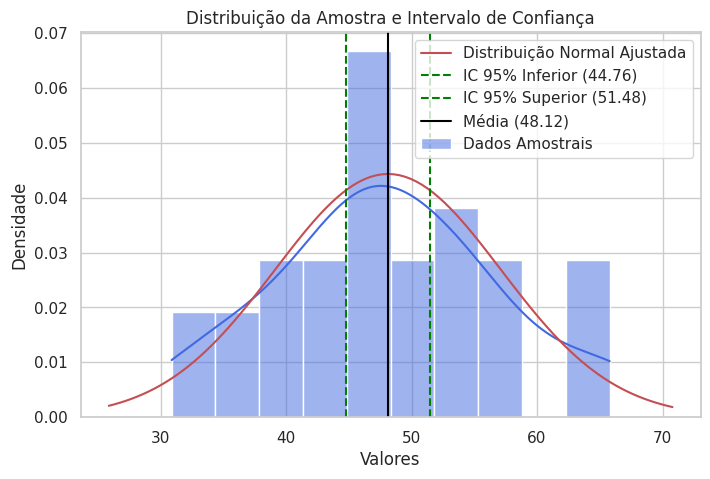

Média da amostra: 48.12
Intervalo de Confiança de 95%: (44.76, 51.48)


In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do Seaborn para melhorar a visualização
sns.set(style="whitegrid")

# Gerando uma amostra aleatória de dados
np.random.seed(42)
dados = np.random.normal(loc=50, scale=10, size=30)  # Média 50, desvio 10, n=30

# Parâmetros da amostra
n = len(dados)
media = np.mean(dados)
desvio = np.std(dados, ddof=1)  # ddof=1 para amostra

# Nível de confiança
conf = 0.95
z = stats.t.ppf((1 + conf) / 2, df=n-1)  # Usando t-student para n < 30

# Cálculo do intervalo de confiança
margem_erro = z * (desvio / np.sqrt(n))
IC = (media - margem_erro, media + margem_erro)

# Criando a distribuição dos dados
x = np.linspace(min(dados)-5, max(dados)+5, 100)
pdf = stats.norm.pdf(x, media, desvio)

# Plotando o histograma e a distribuição normal
plt.figure(figsize=(8, 5))
sns.histplot(dados, kde=True, bins=10, color="royalblue", stat="density", label="Dados Amostrais")
plt.plot(x, pdf, 'r', label="Distribuição Normal Ajustada")

# Destacando o Intervalo de Confiança
plt.axvline(IC[0], color="green", linestyle="--", label=f"IC 95% Inferior ({IC[0]:.2f})")
plt.axvline(IC[1], color="green", linestyle="--", label=f"IC 95% Superior ({IC[1]:.2f})")
plt.axvline(media, color="black", linestyle="-", label=f"Média ({media:.2f})")

# Configurações do gráfico
plt.title("Distribuição da Amostra e Intervalo de Confiança", fontsize=12)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.legend()
plt.show()

# Exibir os valores do intervalo
print(f"Média da amostra: {media:.2f}")
print(f"Intervalo de Confiança de 95%: ({IC[0]:.2f}, {IC[1]:.2f})")


## Código da Figura 2.9 de {cite:p}`bruce2020practical`: Intervalo de Confiança Usando Bootstrap

O código da figura do livro realiza um procedimento de bootstrap para estimar um intervalo de confiança de 90% para a média da renda de empréstimos (*loans_income*). Ele segue as etapas:

Os passos são:

1. Tira uma amostra de 20 valores da distribuição original.
2. Executa 500 reamostragens bootstrap para calcular médias.
3. Constrói um intervalo de confiança de 90% com base nos quantis.
4. Plota o histograma da distribuição das médias bootstrap.
5. Destaque do intervalo de confiança e da média estimada no gráfico.

Aqui usamos *resample* do *scikitlearn*.

Média dos dados originais: 50.29
Média da amostra de 20 elementos: 54.25


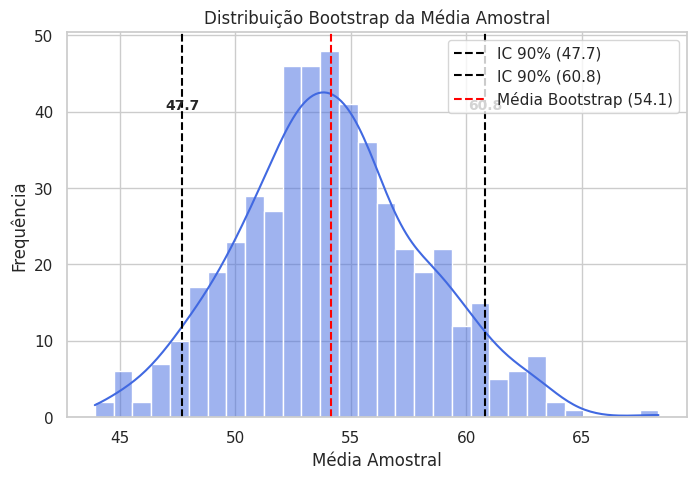

Intervalo de Confiança de 90%: (47.69, 60.80)


In [43]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo do Seaborn
sns.set_style("whitegrid")

# Simulação dos dados (caso loans_income não esteja disponível)
np.random.seed(42)
loans_income = np.random.normal(loc=50, scale=15, size=1000)  # Média 50, Desvio 15, n=1000

# Exibir a média dos dados originais
print(f"Média dos dados originais: {loans_income.mean():.2f}")

# Definir semente e criar uma amostra de 20 valores sem reposição
np.random.seed(3)
sample20 = resample(loans_income, n_samples=20, replace=False)
print(f"Média da amostra de 20 elementos: {sample20.mean():.2f}")

# Bootstrap: 500 reamostragens com reposição da amostra de 20 valores
results = [resample(sample20, replace=True).mean() for _ in range(500)]
results = pd.Series(results)

# Cálculo do intervalo de confiança de 90% (percentis 5% e 95%)
confidence_interval = results.quantile([0.05, 0.95]).tolist()

# Criar o gráfico com Seaborn
plt.figure(figsize=(8, 5))
ax = sns.histplot(results, bins=30, kde=True, color="royalblue")

# Adicionar as linhas do intervalo de confiança
for x in confidence_interval:
    plt.axvline(x, color="black", linestyle="--", label=f"IC 90% ({x:.1f})")
    plt.text(x, ax.get_ylim()[1] * 0.8, f'{x:.1f}', ha='center', fontsize=10, fontweight='bold')

# Adicionar a linha da média da distribuição bootstrap
meanIncome = results.mean()
plt.axvline(meanIncome, color="red", linestyle="dashed", label=f"Média Bootstrap ({meanIncome:.1f})")

# Adicionar título e labels
plt.title("Distribuição Bootstrap da Média Amostral", fontsize=12)
plt.xlabel("Média Amostral")
plt.ylabel("Frequência")
plt.legend()

# Mostrar o gráfico
plt.show()

# Exibir os valores do intervalo de confiança
print(f"Intervalo de Confiança de 90%: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

## Distribuição Normal 

A Distribuição Normal, também conhecida como distribuição Gaussiana, é uma das distribuições estatísticas mais importantes. Ela aparece naturalmente em diversas áreas, como estatística, aprendizado de máquina e economia.  

### Características da Distribuição Normal
1. Forma de Sino: A curva da distribuição normal é simétrica e apresenta um formato de sino.  
2. Média, Mediana e Moda Iguais: Como a distribuição é simétrica, a média (μ), a mediana e a moda coincidem.  
3. Desvio Padrão e Regra Empírica: A dispersão dos dados ao redor da média é medida pelo desvio padrão (σ).

A Regra Empírica (68-95-99.7) estabelece que:  
- 68% dos dados estão dentro de 1 desvio padrão da média (μ ± 1σ).  
- 95% dos dados estão dentro de 2 desvios padrão da média (μ ± 2σ).  
- 99.7% dos dados estão dentro de 3 desvios padrão da média (μ ± 3σ).  

### Dedução da Fórmula da Distribuição Normal

A Distribuição Normal é definida pela seguinte função de densidade de probabilidade (PDF):

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

onde:  
- $ x $ é a variável aleatória contínua  
- $ \mu $ é a média da distribuição  
- $ \sigma $ é o desvio padrão  
- $ \pi $ é a constante matemática $ \approx 3.1416 $  
- $ e $ é a base do logaritmo natural $ \approx 2.718 $  


A distribuição normal pode ser derivada a partir da função geradora de momentos ou da solução da equação diferencial da distribuição de máxima entropia, mas aqui apresentamos um esboço baseado na estatística clássica.

1. A distribuição normal deve satisfazer a condição de ser uma função de densidade de probabilidade, ou seja:

   $$
   \int_{-\infty}^{\infty} f(x) dx = 1
   $$

2. A forma geral de uma distribuição simétrica em torno da média $ \mu $ com um fator de dispersão $ \sigma $ leva à hipótese de uma função exponencial quadrática:

   $$
   f(x) = A e^{-B(x - \mu)^2}
   $$

   onde $ A $ e $ B $ são constantes a serem determinadas.

3. Para garantir que a integral seja 1, resolvemos:

   $$
   \int_{-\infty}^{\infty} A e^{-B(x - \mu)^2} dx = 1
   $$

   Usando a fórmula da integral Gaussiana:

   $$
   \int_{-\infty}^{\infty} e^{-a x^2} dx = \sqrt{\frac{\pi}{a}}, \quad \text{para } a > 0
   $$

   identificamos $ A $ e $ B $ e obtemos:

   $$
   A = \frac{1}{\sigma \sqrt{2\pi}}, \quad B = \frac{1}{2\sigma^2}
   $$

4. Substituindo os valores, chegamos à função de densidade da normal:

   $$
   f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
   $$
 
É importante ressaltar que a função de densidade da distribuição normal modela fenômenos naturais e estatísticos, sendo amplamente utilizada em inferência estatística, aprendizado de máquina e análise de dados.  

Nos próximos tópicos, aplicaremos essa fórmula para calcular probabilidades e intervalos de confiança.  



Abaixo, um gráfico simples ilustra uma distribuição Normal, destacando a região onde se encontram 68%-95%-99.7% dos dados.  

---


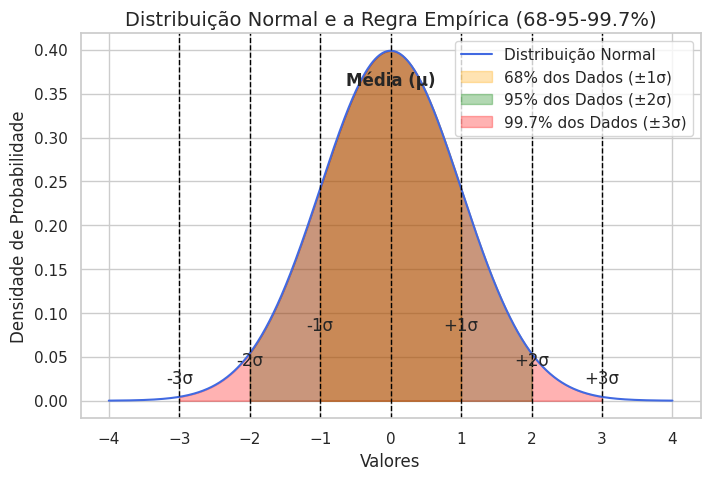

In [37]:
from scipy.stats import norm

# Definição dos parâmetros da distribuição normal
mu, sigma = 0, 1  # Média = 0, Desvio padrão = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Criar o gráfico
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=y, color="royalblue", label="Distribuição Normal")

# Destacar a área de 68% dos dados (entre -1σ e +1σ)
x_fill_68 = np.linspace(mu - sigma, mu + sigma, 300)
y_fill_68 = norm.pdf(x_fill_68, mu, sigma)
plt.fill_between(x_fill_68, y_fill_68, alpha=0.3, color="orange", label="68% dos Dados (±1σ)")

# Destacar a área de 95% dos dados (entre -2σ e +2σ)
x_fill_95 = np.linspace(mu - 2*sigma, mu + 2*sigma, 300)
y_fill_95 = norm.pdf(x_fill_95, mu, sigma)
plt.fill_between(x_fill_95, y_fill_95, alpha=0.3, color="green", label="95% dos Dados (±2σ)")

# Destacar a área de 99.7% dos dados (entre -3σ e +3σ)
x_fill_99 = np.linspace(mu - 3*sigma, mu + 3*sigma, 300)
y_fill_99 = norm.pdf(x_fill_99, mu, sigma)
plt.fill_between(x_fill_99, y_fill_99, alpha=0.3, color="red", label="99.7% dos Dados (±3σ)")

# Adicionar linhas verticais para os desvios padrão
plt.axvline(mu, color="black", linestyle="dashed", linewidth=1)
plt.axvline(mu - sigma, color="black", linestyle="dashed", linewidth=1)
plt.axvline(mu + sigma, color="black", linestyle="dashed", linewidth=1)
plt.axvline(mu - 2*sigma, color="black", linestyle="dashed", linewidth=1)
plt.axvline(mu + 2*sigma, color="black", linestyle="dashed", linewidth=1)
plt.axvline(mu - 3*sigma, color="black", linestyle="dashed", linewidth=1)
plt.axvline(mu + 3*sigma, color="black", linestyle="dashed", linewidth=1)

# Anotações
plt.text(mu, max(y)*0.9, "Média (μ)", ha="center", fontsize=12, fontweight="bold")
plt.text(mu - sigma, max(y)*0.2, "-1σ", ha="center", fontsize=12)
plt.text(mu + sigma, max(y)*0.2, "+1σ", ha="center", fontsize=12)
plt.text(mu - 2*sigma, max(y)*0.1, "-2σ", ha="center", fontsize=12)
plt.text(mu + 2*sigma, max(y)*0.1, "+2σ", ha="center", fontsize=12)
plt.text(mu - 3*sigma, max(y)*0.05, "-3σ", ha="center", fontsize=12)
plt.text(mu + 3*sigma, max(y)*0.05, "+3σ", ha="center", fontsize=12)

# Ajustes finais
plt.title("Distribuição Normal e a Regra Empírica (68-95-99.7%)", fontsize=14)
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.show()


## Distribuição Normal Padrão e Gráficos QQ
 
A Normal Padrão é uma distribuição normal com média igual a zero (μ = 0) e desvio padrão igual a um (σ = 1). Ela é amplamente utilizada como referência para a análise de dados que seguem uma distribuição normal, já que qualquer distribuição normal pode ser transformada na normal padrão por meio da padronização dos dados.
 
### Transformação para Normal Padrão

Se tivermos uma variável $X$ com média $\mu$ e desvio padrão $\sigma$, podemos transformá-la para a normal padrão $Z$ utilizando a fórmula:

$$
Z = \frac{X - \mu}{\sigma}
$$

Essa transformação permite que possamos comparar qualquer variável com a distribuição normal padrão, que é uma base para muitas análises estatísticas.


---

### Gráfico QQ (Quantile-Quantile Plot)

Um Gráfico QQ (Quantile-Quantile Plot) é utilizado para comparar a distribuição de uma amostra com uma distribuição teórica, como a normal. No gráfico QQ, os quantis da amostra são plotados contra os quantis de uma distribuição teórica. Se os pontos no gráfico se alinham aproximadamente com uma linha reta, isso indica que a amostra segue a distribuição teórica com boa aproximação.

O gráfico QQ é útil para:
- Verificar a normalidade dos dados.
- Detectar desvios da normalidade, como assimetrias ou caudas pesadas.

#### Interpretando o Gráfico QQ
- Se os pontos se alinham com uma linha reta, a distribuição da amostra é semelhante à distribuição teórica (normal, no caso).
- Se os pontos se afastam da linha reta, isso indica que a amostra não segue a distribuição normal.

#### Código para Gerar um Gráfico QQ

Aqui está um exemplo de código em Python para gerar um gráfico QQ de uma amostra simulada, comparando-a com a distribuição normal padrão:

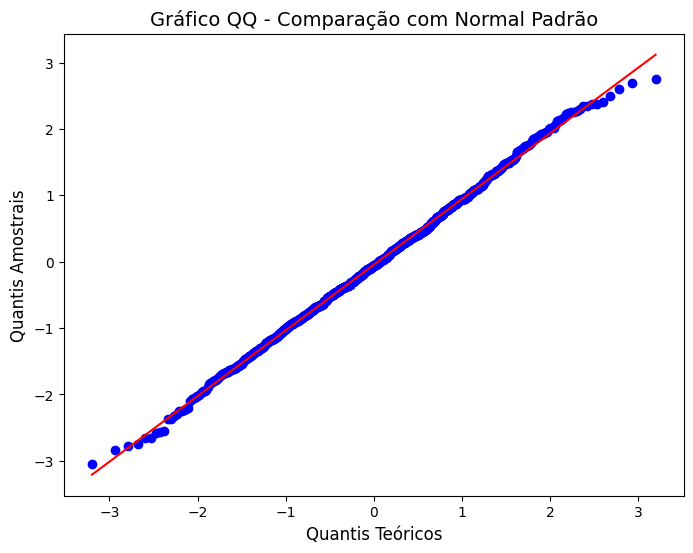

In [18]:
# Gerando uma amostra de dados
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # Amostra de uma normal padrão

# Criando o gráfico QQ
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Gráfico QQ - Comparação com Normal Padrão", fontsize=14)
# Alterando os labels para português
plt.xlabel("Quantis Teóricos", fontsize=12)
plt.ylabel("Quantis Amostrais", fontsize=12)

plt.show()


## Distribuições de Cauda Longa
 
Uma distribuição de cauda longa é uma classe de distribuições estatísticas que tem uma cauda mais "longa" ou mais espessa do que a distribuição normal. Em outras palavras, as distribuições de cauda longa possuem uma probabilidade significativa de valores extremos (ou outliers) em comparação com distribuições mais simétricas, como a normal.

Essas distribuições são importantes porque descrevem muitos fenômenos naturais, sociais e econômicos, onde eventos raros, mas de grande impacto, podem ocorrer com maior frequência do que seria esperado com uma distribuição normal.

### Características das Distribuições de Cauda Longa

As distribuições de cauda longa têm as seguintes características principais:
- Caudas espessas: Há uma maior probabilidade de valores extremos ou "outliers" (valores muito distantes da média).
- Assimetrias: Elas podem ser assimétricas, com a cauda se estendendo mais para a direita (positiva) ou para a esquerda (negativa).
- Ajuste a eventos raros: Muitos fenômenos que envolvem risco, como catástrofes naturais, falhas financeiras, ou transmissões de doenças, podem ser modelados por distribuições de cauda longa.

A distribuição normal, em contraste, tem uma cauda bem mais curta, onde os valores extremos são extremamente raros.

### Exemplos de Distribuições de Cauda Longa

#### 1. Distribuição de Pareto
A distribuição de Pareto é famosa por modelar riqueza ou distribuição de renda na economia, onde a maior parte da riqueza é controlada por uma pequena parte da população. Essa distribuição é caracterizada por uma cauda longa à direita, com muitos indivíduos possuindo pequenas quantias de riqueza e poucos indivíduos com grandes fortunas.

A fórmula da distribuição de Pareto é:

$$ f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}} $$

Onde:
- $\alpha$ é o parâmetro de forma (o "índice de Pareto"),
- $x_m$ é o valor mínimo (valor de corte para os dados).

#### 2. Distribuição Exponencial
A distribuição exponencial é usada para modelar o tempo entre eventos em um processo de Poisson, como o tempo de espera entre chegadas em um sistema de filas. Ela tem uma cauda longa à direita, já que o tempo de espera entre eventos pode variar bastante.

A fórmula da distribuição exponencial é:

$$ f(x) = \lambda e^{-\lambda x} \quad \text{para} \quad x \geq 0 $$

Onde:
- $\lambda$ é a taxa de eventos.

#### 3. Distribuição Log-Normal
Quando uma variável aleatória tem uma distribuição log-normal, isso significa que o logaritmo dos dados segue uma distribuição normal. Muitas variáveis financeiras, como os preços de ativos ou o tempo de vida útil de um componente, podem seguir uma distribuição log-normal, caracterizada por caudas longas.

A fórmula da distribuição log-normal é:

$$ f(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln(x) - \mu)^2}{2\sigma^2} \right) $$

Onde:
- $\mu$ é a média do logaritmo dos dados,
- $\sigma$ é o desvio padrão do logaritmo dos dados.

#### 4. Distribuição de Cauchy
A distribuição de Cauchy possui caudas extremamente longas e é usada em contextos onde os dados podem ter grandes flutuações ou outliers. Ela é frequentemente usada para modelar respostas de sistemas físicos.

A fórmula da distribuição de Cauchy é:

$$ f(x) = \frac{1}{\pi \gamma \left[ 1 + \left( \frac{x - x_0}{\gamma} \right)^2 \right]} $$

Onde:
- $x_0$ é a localização do pico da distribuição,
- $\gamma$ é o parâmetro que determina a largura da cauda.

##### 5. Distribuição Gamma

A distribuição Gamma é uma das distribuições contínuas mais utilizadas em modelagem estatística e tem diversas aplicações, principalmente em processos estocásticos como os processos de Poisson. Ela é frequentemente usada para modelar o tempo até a ocorrência de um evento específico, como o tempo até o falhamento de um sistema, ou a soma de várias variáveis exponenciais independentes.
 
A distribuição Gamma é caracterizada por dois parâmetros principais:

- Forma ($\alpha$): Esse parâmetro controla a forma da distribuição. Quando $\alpha = 1$, a distribuição Gamma se torna uma distribuição Exponencial. Para valores maiores de $\alpha$, a distribuição se aproxima de uma forma mais simétrica, similar à distribuição normal.

- Escala ($\beta$): Este parâmetro controla a "largura" da distribuição, afetando diretamente a dispersão dos dados ao redor da média.

A função de densidade de probabilidade (PDF) da distribuição Gamma é dada por:

$$
f(x|\alpha, \beta) = \frac{x^{\alpha-1} e^{-x/\beta}}{\Gamma(\alpha) \beta^{\alpha}}, \quad x > 0
$$

Onde:
- $x$ é a variável aleatória,
- $\alpha$ é o parâmetro de forma,
- $\beta$ é o parâmetro de escala,
- $\Gamma(\alpha)$ é a função Gamma (uma generalização da função fatorial para números reais).
 
A distribuição Gamma é conhecida por ter uma cauda longa à direita, o que significa que a probabilidade de ocorrências muito grandes (valores altos de $x$) diminui mais devagar em comparação com distribuições como a Normal. Isso a torna útil para modelar fenômenos onde grandes valores são possíveis, mas raros.

- Quando $\alpha$ é pequeno (por exemplo, $\alpha = 1$), a distribuição Gamma se assemelha a uma distribuição Exponencial, que modela o tempo entre eventos em um processo de Poisson.
- Quando $\alpha$ é maior que 1, a distribuição Gamma se torna mais simétrica, aproximando-se da Normal em alguns casos, mas ainda com uma cauda mais pesada.

##### Dedução da Distribuição Gamma

Por conveniência vamos deduzir a Distribuição Gamma.
Ela pode ser uma distribuição contínua comumente usada para modelar o tempo até que ocorram múltiplos eventos em um processo de Poisson. Ela pode ser vista como uma generalização da distribuição Exponencial e é deduzida a partir da soma de variáveis exponenciais independentes.  
 
Dedução a partir da soma de variáveis exponenciais

Passo 1: Definição de uma variável Exponencial

A distribuição Exponencial é frequentemente usada para modelar o tempo até o primeiro evento de um processo de Poisson. A sua densidade de probabilidade é dada por:

$$
f(x; \lambda) = \lambda e^{-\lambda x} \quad \text{para} \ x \geq 0
$$

onde $\lambda$ é o parâmetro da taxa (rate parameter), e $x$ é o tempo até o primeiro evento.

Passo 2: Soma de variáveis exponenciais

Agora, consideramos a soma de $k$ variáveis aleatórias exponenciais independentes $X_1, X_2, ..., X_k$ com o mesmo parâmetro $\lambda$. A variável aleatória $Y$ que representa essa soma é dada por:

$$
Y = X_1 + X_2 + ... + X_k
$$

A distribuição resultante para $Y$, que é a soma de $k$ variáveis exponenciais, segue uma distribuição Gamma com parâmetro de forma $\alpha = k$ e parâmetro de escala $\beta = \frac{1}{\lambda}$.

Passo 3: Função densidade de probabilidade da soma

A função densidade de probabilidade para a soma de $k$ variáveis exponenciais independentes é derivada através da convolução das distribuições das variáveis individuais. O resultado final é:

$$
f_Y(y; k, \lambda) = \frac{\lambda^k y^{k-1} e^{-\lambda y}}{(k-1)!} \quad \text{para} \ y \geq 0
$$

Isso é exatamente a fórmula da distribuição Gamma com $\alpha = k$ e $\beta = \frac{1}{\lambda}$. Ou seja, a soma de $k$ variáveis exponenciais segue uma distribuição Gamma.

Passo 4: Generalização para parâmetros contínuos

A distribuição Gamma pode ser generalizada para qualquer valor de $\alpha$ (não apenas um número inteiro). Para valores não inteiros de $\alpha$, a função de densidade de probabilidade é dada por:

$$
f(x; \alpha, \beta) = \frac{x^{\alpha - 1} e^{-x/\beta}}{\Gamma(\alpha) \beta^{\alpha}} \quad \text{para} \ x \geq 0
$$

Aqui, $\Gamma(\alpha)$ é a função Gamma, que é uma generalização do fatorial para números reais.

A dedução da distribuição Gamma pode ser vista como a soma de $\alpha$ variáveis aleatórias exponenciais independentes. Ela é uma generalização da distribuição Exponencial, onde $\alpha$ representa o número de eventos ou a quantidade de variáveis exponenciais somadas.  

Aplicações da Distribuição Gamma

A distribuição Gamma tem ampla aplicação, principalmente em modelagem de:
- Tempos de espera até a ocorrência de um número fixo de eventos (processos de Poisson),
- Vida útil de componentes em sistemas de engenharia, onde o tempo de falha é modelado como uma variável aleatória de cauda longa,
- Processos financeiros e análise de risco, onde eventos raros podem ter um impacto substancial.

#### Gráfico de Comparação

No gráfico abaixo, podemos observar a forma das distribuições.
 



/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


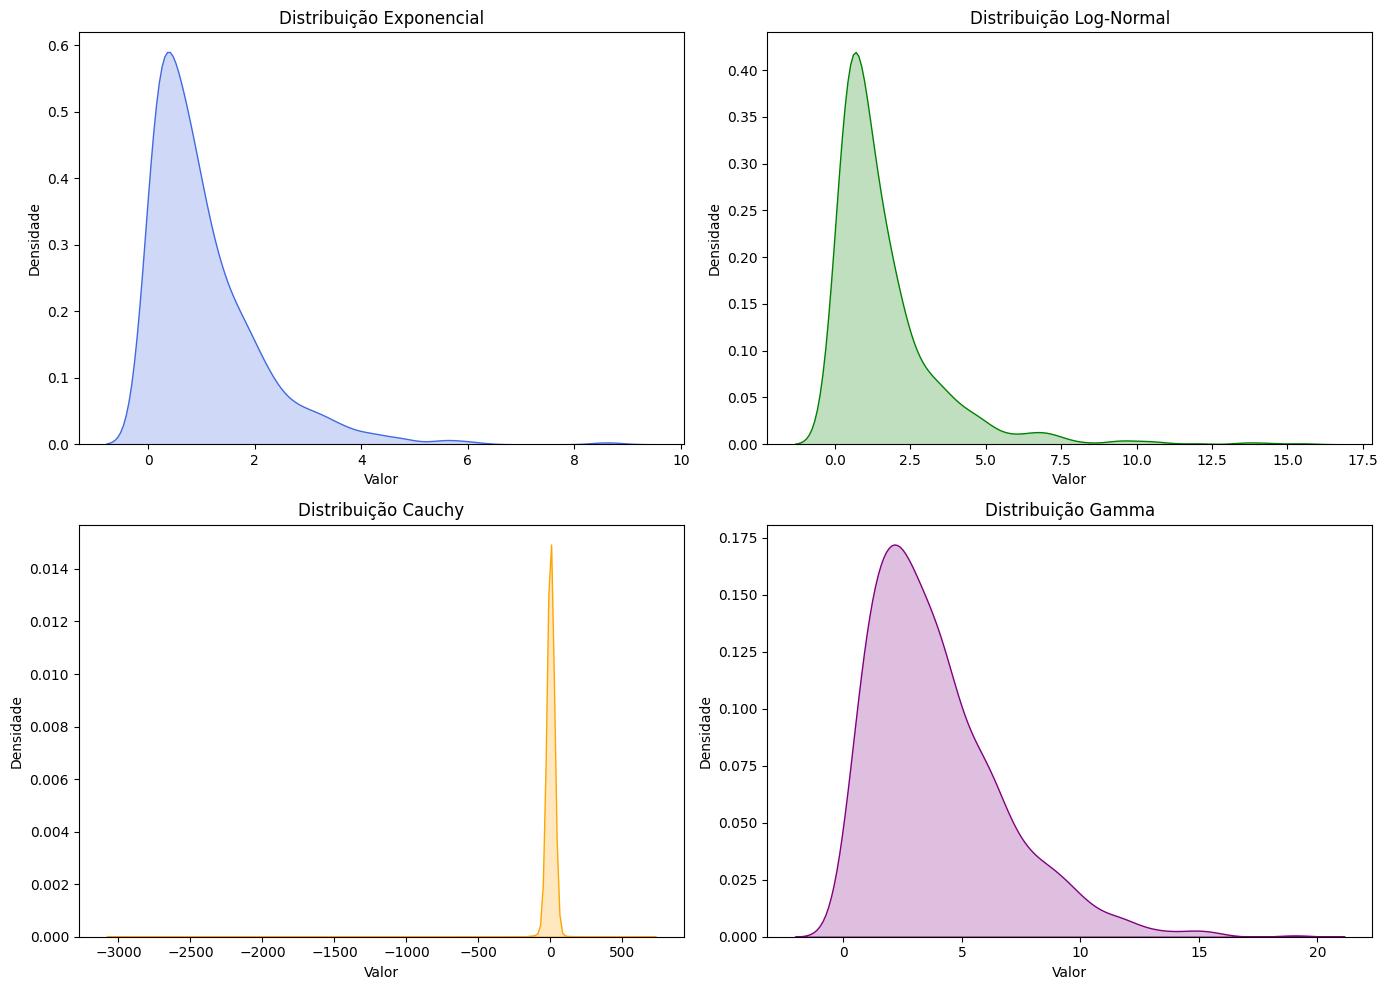

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, cauchy, gamma

# Definir parâmetros
size = 1000
mu = 0
sigma = 1
lambda_ = 1
gamma_shape = 2  # Parâmetro de forma para a distribuição Gamma
gamma_scale_param = 2  # Parâmetro de escala para a distribuição Gamma
x0 = 0  # Parâmetro de localização para a distribuição Cauchy
cauchy_scale = 1  # Parâmetro de escala para a distribuição Cauchy

# Gerar dados para cada distribuição
expon_data = expon.rvs(scale=1/lambda_, size=size)
lognorm_data = lognorm.rvs(sigma, loc=mu, scale=np.exp(mu), size=size)
cauchy_data = cauchy.rvs(x0, cauchy_scale, size=size)
gamma_data = gamma.rvs(gamma_shape, scale=gamma_scale_param, size=size)

# Criar gráficos separados para cada distribuição
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribuição Exponencial
sns.kdeplot(expon_data, ax=axes[0, 0], color='royalblue', fill=True)
axes[0, 0].set_title('Distribuição Exponencial')
axes[0, 0].set_xlabel('Valor')
axes[0, 0].set_ylabel('Densidade')

# Distribuição Log-Normal
sns.kdeplot(lognorm_data, ax=axes[0, 1], color='green', fill=True)
axes[0, 1].set_title('Distribuição Log-Normal')
axes[0, 1].set_xlabel('Valor')
axes[0, 1].set_ylabel('Densidade')

# Distribuição Cauchy
sns.kdeplot(cauchy_data, ax=axes[1, 0], color='orange', fill=True)
axes[1, 0].set_title('Distribuição Cauchy')
axes[1, 0].set_xlabel('Valor')
axes[1, 0].set_ylabel('Densidade')

# Distribuição Gamma
sns.kdeplot(gamma_data, ax=axes[1, 1], color='purple', fill=True)
axes[1, 1].set_title('Distribuição Gamma')
axes[1, 1].set_xlabel('Valor')
axes[1, 1].set_ylabel('Densidade')

# Ajustes finais e exibição
plt.tight_layout()
plt.show()


## Diferença entre a Distribuição Normal e Cauda Longa em QQPlots

Como vimos, a distribuição normal é uma distribuição simétrica e de cauda curta, amplamente utilizada em estatísticas devido à sua ocorrência frequente em fenômenos naturais (como altura, peso, etc.). Os dados que seguem uma distribuição normal terão um QQPlot que se alinha de forma bem próxima a uma linha reta.
 
Cauda Longa e QQPlot

As distribuições de cauda longa (como a Exponencial, Log-Normal, Cauchy, e Gamma) são caracterizadas por uma cauda mais "pesada". Isso significa que esses dados têm uma maior probabilidade de gerar valores extremos em comparação com a normal. Quando plotamos um QQPlot para essas distribuições, os pontos frequentemente se desviam da linha reta, mostrando que a distribuição dos dados não segue uma distribuição normal.

Características de uma Distribuição de Cauda Longa:
- Cauda longa, com maior probabilidade de gerar outliers.
- A distribuição não é simétrica, e pode ser assimétrica.
- A distribuição tem um comportamento mais disperso.

Comparação Visual com QQPlot

A seguir, vamos gerar os QQPlots para a distribuição normal e as distribuições de cauda longa (Exponencial, Log-Normal, Cauchy e Gamma) usando os mesmos dados. Como esperado, a distribuição normal apresentará um QQPlot mais alinhado à linha reta, enquanto as distribuições de cauda longa se desviarão dessa linha.

---
 

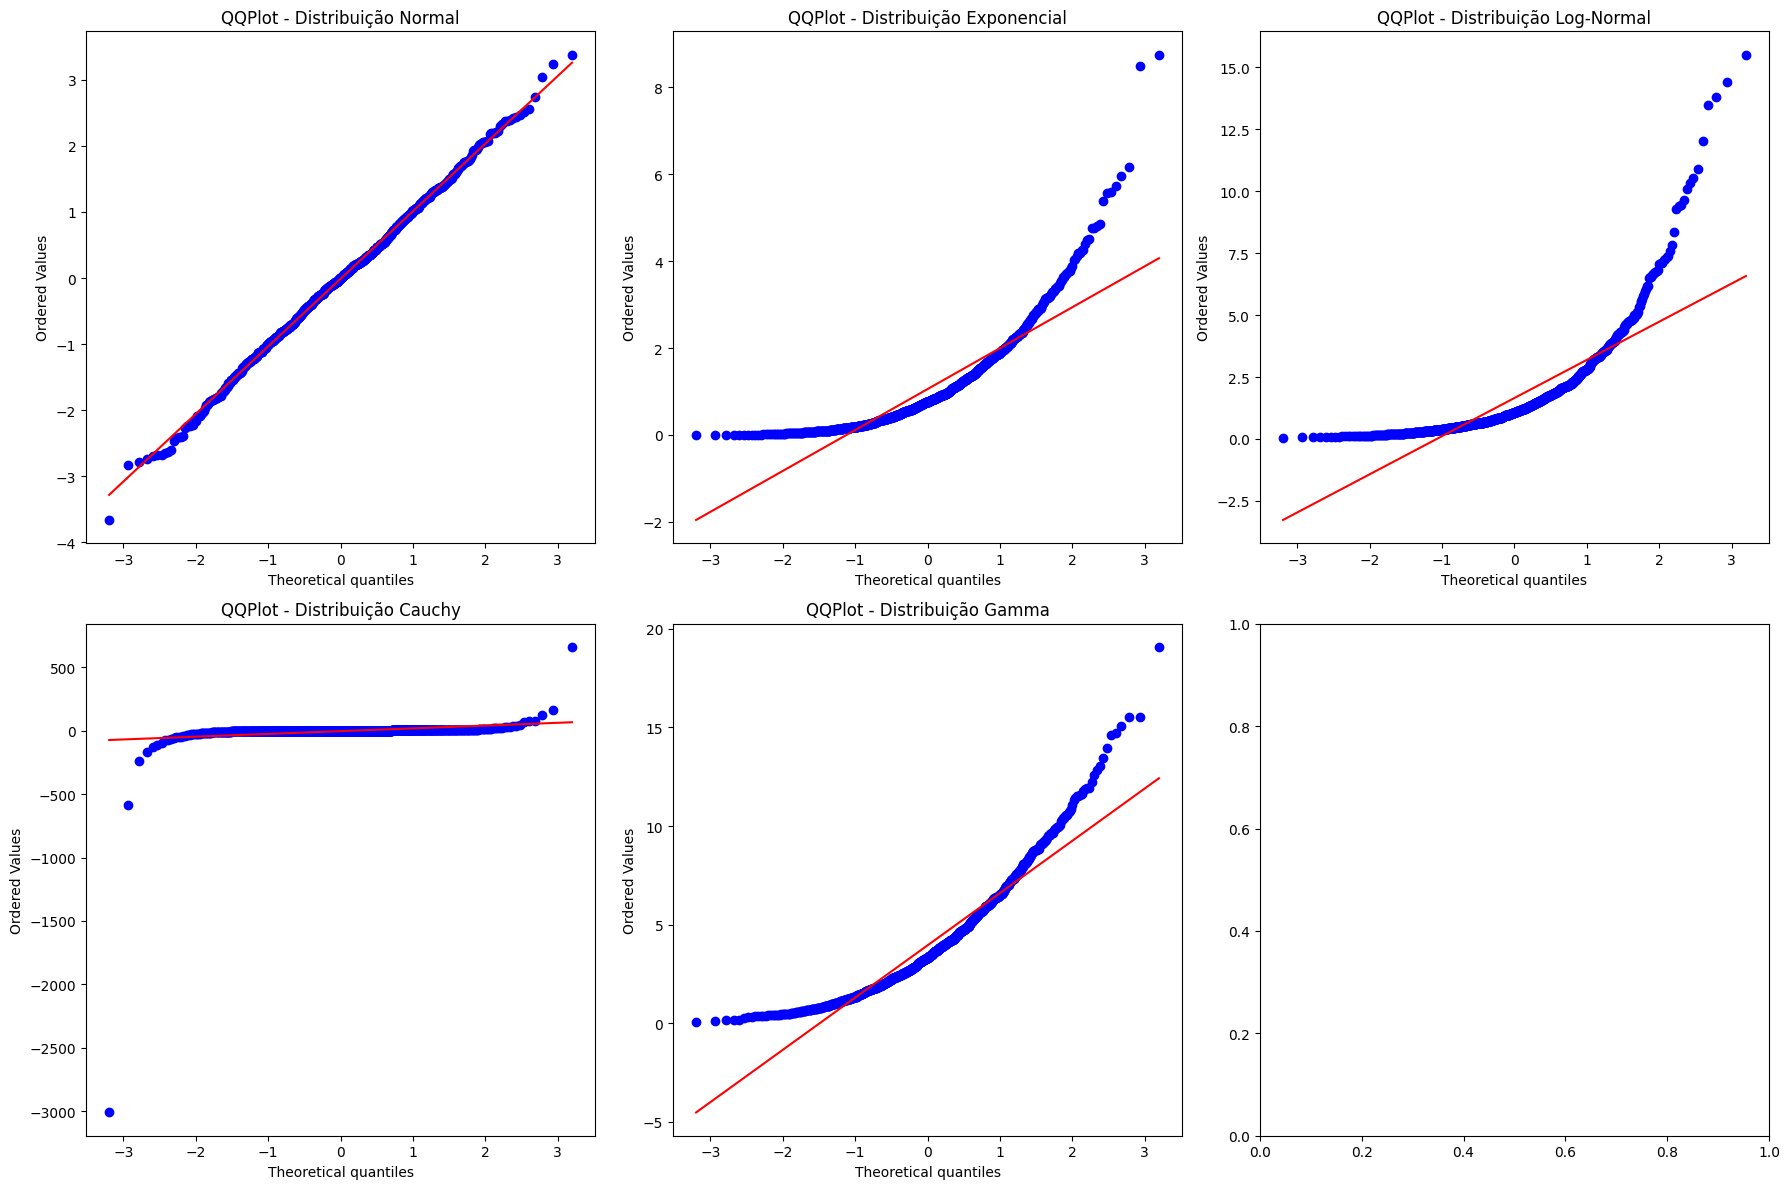

In [3]:
# importando biblioteca norm.rvs
from scipy.stats import norm

normal_data = norm.rvs(mu, sigma, size=size)
# Criar os QQPlots para cada distribuição
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# QQPlot para a Distribuição Normal
stats.probplot(normal_data, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQPlot - Distribuição Normal')

# QQPlot para a Distribuição Exponencial
stats.probplot(expon_data, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQPlot - Distribuição Exponencial')

# QQPlot para a Distribuição Log-Normal
stats.probplot(lognorm_data, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('QQPlot - Distribuição Log-Normal')

# QQPlot para a Distribuição Cauchy
stats.probplot(cauchy_data, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQPlot - Distribuição Cauchy')

# QQPlot para a Distribuição Gamma
stats.probplot(gamma_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQPlot - Distribuição Gamma')

# Ajustes finais e exibição
plt.tight_layout()
plt.show()

## Outras Distribuições

Existem várias distribuições de probabilidade além das mais comuns, como a Normal e a Exponencial, que são amplamente utilizadas em diversos campos, como estatísticas, engenharia, economia e ciências. Neste capítulo, vamos explorar algumas dessas distribuições: Distribuição t de Student, Distribuição de Poisson e Distribuição de Weibull.

### Distribuição t de Student

A distribuição t de Student é uma distribuição de probabilidade contínua que aparece frequentemente em problemas de inferência estatística, especialmente quando se trabalha com amostras pequenas. Ela é amplamente utilizada para estimar a média de uma população quando a amostra é pequena e a distribuição da população é normal, mas a variância é desconhecida.

A fórmula da função de densidade de probabilidade (PDF) da distribuição t de Student é dada por:

$$
f(x; \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\,\Gamma\left(\frac{\nu}{2}\right)} \left( 1 + \frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}, \quad -\infty < x < \infty
$$

Onde:
- $\nu$ é o grau de liberdade (degrees of freedom),
- $\Gamma(\cdot)$ é a função Gamma, que generaliza o fatorial para números não inteiros.

#### Características:
- Quando $\nu$ é grande, a distribuição t se aproxima da distribuição normal.
- Para $\nu = 1$, a distribuição t de Student é conhecida como distribuição de Cauchy.
- Quanto menor o grau de liberdade, mais "espalhada" e com caudas mais longas é a distribuição t.

A distribuição t de Student é utilizada principalmente em testes de hipóteses e na análise de variância quando se trabalha com amostras pequenas.

---

### Distribuição de Poisson

A distribuição de Poisson é uma distribuição discreta de probabilidade que descreve o número de eventos ocorrendo em um intervalo de tempo ou espaço fixo, sob a condição de que os eventos ocorram de forma independente e a uma taxa constante. Ela é usada em contextos como contagem de chamadas telefônicas recebidas, número de falhas em um sistema ou o número de carros que passam por um ponto de pedágio.

A função de massa de probabilidade (PMF) da distribuição de Poisson é dada por:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

Onde:
- $k$ é o número de eventos,
- $\lambda$ é a taxa média de ocorrência dos eventos no intervalo (parâmetro de Poisson),
- $e$ é a base do logaritmo natural.

#### Características:
- A média e a variância da distribuição de Poisson são ambas iguais a $\lambda$.
- Quando $\lambda$ é grande, a distribuição de Poisson se aproxima de uma distribuição normal com média $\lambda$ e variância $\lambda$.
 

---

### Distribuição de Weibull

A distribuição de Weibull é uma distribuição contínua que é amplamente utilizada para modelar o tempo até a falha de um componente ou sistema. Ela é particularmente útil na análise de sobrevivência e em estudos de confiabilidade, uma vez que permite modelar tanto distribuições com caudas curtas quanto com caudas longas.

A função de densidade de probabilidade (PDF) da distribuição de Weibull é dada por:

$$
f(x; \lambda, k) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}, \quad x \geq 0
$$

Onde:
- $\lambda$ é o parâmetro de escala (scale parameter),
- $k$ é o parâmetro de forma (shape parameter),
- $e$ é a base do logaritmo natural.

#### Características:
- Quando $k = 1$, a distribuição de Weibull se reduz à distribuição Exponencial.
- Quando $k > 1$, a distribuição tem cauda mais longa e é usada para modelar falhas mais frequentes.
- Quando $k < 1$, a distribuição tem uma cauda mais curta e é usada para modelar falhas mais raras.
 

---
 
Exploramos, neste tópico, três distribuições importantes que têm aplicações em diversas áreas:

1. Distribuição t de Student, usada principalmente para inferência estatística em amostras pequenas.
2. Distribuição de Poisson, que modela o número de eventos discretos ocorrendo em intervalos de tempo ou espaço.
3. Distribuição de Weibull, usada na análise de sobrevivência e confiabilidade, modelando o tempo até a falha de um sistema.

Essas distribuições têm formas e comportamentos distintos e são úteis em muitos contextos, desde a estatística até a engenharia e a modelagem de riscos.



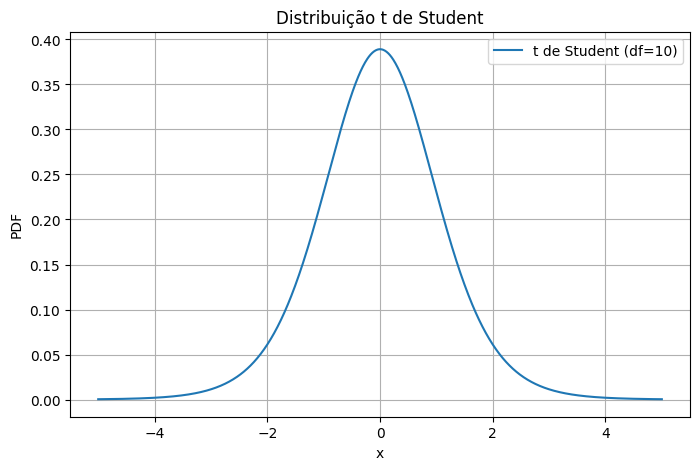

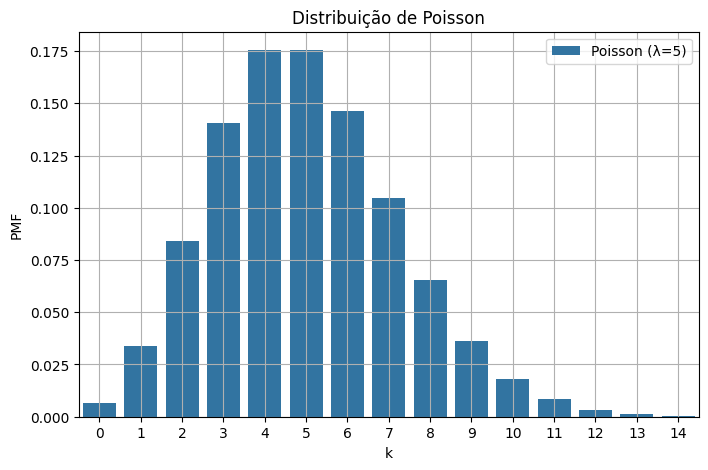

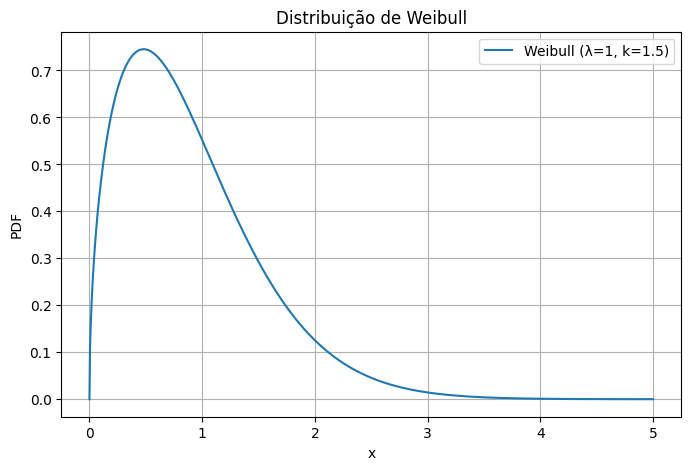

In [4]:
from scipy.stats import t
from scipy.stats import poisson
from scipy.stats import weibull_min


# Parâmetros
df = 10  # graus de liberdade
x = np.linspace(-5, 5, 1000)

# PDF da distribuição t de Student
pdf_values = t.pdf(x, df)

# Plot usando Seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=pdf_values, label=f't de Student (df={df})')
plt.title('Distribuição t de Student')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()
 


# Parâmetros
lambda_ = 5  # taxa média de ocorrência
k_values = np.arange(0, 15)

# PMF da distribuição de Poisson
pmf_values = poisson.pmf(k_values, lambda_)

# Plot usando Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, label=f'Poisson (λ={lambda_})')
plt.title('Distribuição de Poisson')
plt.xlabel('k')
plt.ylabel('PMF')
plt.legend()
plt.grid(True)
plt.show()
 

# Parâmetros
lambda_ = 1  # parâmetro de escala
k = 1.5  # parâmetro de forma
x = np.linspace(0, 5, 1000)

# PDF da distribuição de Weibull
pdf_values = weibull_min.pdf(x, k, scale=lambda_)

# Plot usando Seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=pdf_values, label=f'Weibull (λ={lambda_}, k={k})')
plt.title('Distribuição de Weibull')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()

Veja que o gráfico da Distribuição de Poisson saiu como um histograma (ou gráfico de barras) e não como uma curva porque a Distribuição de Poisson é uma distribuição discreta, ou seja, ela é definida apenas para valores inteiros (como 0, 1, 2, 3, etc.). Portanto, faz sentido representá-la como um gráfico de barras, onde cada barra corresponde à probabilidade de um valor específico 
$k$.

### A Distribuição Qui-Quadrado

A distribuição qui-quadrado $( \chi^2_n $) com $ n $ graus de liberdade (df) é a distribuição da soma dos quadrados de $ n $ variáveis normais padrão independentes $ N(0,1) $. 

Seja $ X \thicksim N(\mu, \sigma^2) $, então:

$ Z = \frac{X - \mu}{\sigma} \thicksim N(0,1) $

#### Propriedades:
- O quadrado de uma variável normal padrão segue uma distribuição qui-quadrado com um grau de liberdade:
  
  $ Z^2 \thicksim \chi^2_1 \quad \text{(um grau de liberdade)} $
  
- A distribuição da soma dos quadrados de $ n $ variáveis normais:
  
  $ \sum_{i=1}^{n} Z_i^2 \thicksim \chi^2_n $
  
- A soma de duas variáveis qui-quadrado com $ p $ e $ q $ graus de liberdade resulta em outra variável qui-quadrado com $ p + q $ graus de liberdade:
  
  $ \chi^2_p + \chi^2_q \thicksim \chi^2_{p+q} $
  
  Essa propriedade é útil ao somar ou subtrair somas de quadrados.

#### Aplicações:
A distribuição qui-quadrado é utilizada para modelar erros medidos como soma de quadrados ou para descrever a distribuição da variância amostral.


---
### Distribuição Binomial

A distribuição binomial é uma distribuição de probabilidade discreta que descreve o número de sucessos em uma sequência fixa de experimentos independentes, onde cada experimento tem apenas dois possíveis resultados: sucesso ou fracasso. Ela é usada quando queremos modelar eventos do tipo "sim ou não", como o número de clientes que compram um produto, ou o número de vezes que uma moeda cai em "cara" após várias jogadas.

A função de massa de probabilidade (PMF) da distribuição binomial é dada por:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad k = 0, 1, 2, \dots, n
$$

Onde:
- $k$ é o número de sucessos desejados,
- $n$ é o número total de experimentos (ou tentativas),
- $p$ é a probabilidade de sucesso em uma única tentativa,
- $\binom{n}{k}$ é o coeficiente binomial, calculado como $\frac{n!}{k!(n-k)!}$.

#### Características:
- A média da distribuição binomial é $\mu = np$.
- A variância é $\sigma^2 = np(1 - p)$.
- Os experimentos devem ser independentes e com a mesma probabilidade de sucesso $p$.
- Quando $n$ é grande e $p$ não está muito próximo de 0 ou 1, a distribuição binomial pode ser aproximada pela normal.

A distribuição binomial é fundamental em testes de hipóteses para proporções, controle de qualidade e modelagem de eventos discretos com dois resultados possíveis.


---

### A Distribuição F de Fisher

A distribuição F de Fisher, $ F_{n,p} $, com $ n $ e $ p $ graus de liberdade, é a razão entre duas variáveis independentes qui-quadrado. 

Seja $ X \sim \chi^2_n $ e $ Y \sim \chi^2_p $, então:

$ F_{n,p} = \frac{X/n}{Y/p} $

#### Aplicações:
A distribuição F desempenha um papel central nos testes de hipótese, respondendo questões como:
- As variâncias de duas populações são iguais?
- A razão entre dois erros é significativamente grande?

---

Neste capítulo, exploramos distribuições estatísticas fundamentais.

No próximo tópico, abordaremos os **Testes de Hipótese na Estatística Frequentista**, onde utilizaremos essas distribuições para avaliar a significância estatística de amostras e comparar parâmetros populacionais.


## Distribuições e Probabilidades 

### Probilidade e Distribuição Normal

#### Exemplo de Uso

Uma empresa fez um concurso para seleção de novos funcionários. A prova tinha 50 questões e o Pedro acertou 40 questões. Considerando uma distribuição normal com média 24 e desvio padrão de 8, quais são as chances dele ser contratado?


In [5]:

X = 40
media = 24
desvio_padrao = 8


In [6]:
padronizado = (X - media) / desvio_padrao
padronizado

2.0


Pela tabela Z

2.0 e segunda casa decimal 0  ->  0.9772

Usando scipy.stats para calcular a probabilidade

In [7]:
import scipy.stats as stats
stats.norm.cdf(padronizado)

0.9772498680518208

### Probabilidade com Distribuição Binomial

#### Exemplo

Jogando a moeda 10 vezes, qual a probabilidade de obter 5 "caras"?

In [8]:
n = 10
x = 5
p = 0.5

In [9]:
import math
(math.factorial(n)) / (math.factorial(x) * math.factorial(n - x)) * math.pow(p, x) * math.pow(1 - p, n - x)

0.24609375

In [10]:
stats.binom.pmf(x, n, p)

0.24609375000000003

#### Exemplo

70% das pessoas que compraram o livro de Python são mulheres. Se 10 leitores forem selecionados randomicamente, qual a probabilidade de selecionarmos 7 mulheres?

In [11]:
n = 10
x = 7
p = 0.7
stats.binom.pmf(x, n, p)

0.26682793200000005

### Probabilidade e distribuição de Poisson

#### Exemplo

O número médio de carros vendidos por dia é 10. Qual a probabilidade de vender 14 carros amanhã?

In [12]:
x = 14
media = 10

In [13]:
math.e

2.718281828459045

In [14]:
math.pow(math.e, -media) * (math.pow(media, x) / math.factorial(x)) * 100

5.207710444602621

Usando o pacote Stats 

In [15]:
stats.poisson.pmf(x, media) * 100

5.207710444602616

#### Exemplo

Em uma linha de produção de uma fábrica de parafusos, a probabilidade é de obter 0,05 defeitos por UNIDADE. Qual a probabilidade de uma unidade apresentar:
 - Um defeito
 - Nenhum defeito

In [16]:
x = 1
media = 0.05 

In [17]:
stats.poisson.pmf(x, media) * 100

4.756147122503571

In [18]:
x = 0
media = 0.05
stats.poisson.pmf(x, media) * 100

95.1229424500714